# Композиция алгоритмов


In [ ]:
from tkinter import *
import tkinter.ttk as ttk
from tkinter import messagebox # Всплывающие окна
import urllib.request
import datetime
import calendar
import xml.dom.minidom
from datetime import *
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib # Построение графиков

def parse_xaml_from_url(url):
    result = []
    current_date = datetime.now().strftime("%d/%m/%Y") # Получаем текущую дату
    if not url: #  Формируем URL с текущей датой, если URL не был указан
        url = f"https://www.cbr.ru/scripts/XML_daily.asp?date_req={current_date}"
    try:
        response = urllib.request.urlopen(url) #  Получаем данные по указанному URL
        data = response.read()
        dom_tree = xml.dom.minidom.parseString(data) #  Преобразуем данные в DOM-дерево XML
        root = dom_tree.documentElement #  Получаем корневой элемент
        valute_elements = root.getElementsByTagName('Valute') #  Получаем все элементы 'Valute'
        for valute_element in valute_elements:  # Проходимся по каждому элементу 'Valute'
            valute_id = valute_element.getAttribute('ID')  # Получаем значение атрибута 'ID'
            name = valute_element.getElementsByTagName('Name')[0].firstChild.data  # Получаем значение элемента 'Name'
            value = valute_element.getElementsByTagName('Value')[0].firstChild.data  # Получаем значение элемента 'Value'
            result.append({"ID": valute_id, "Name": name, "Value": value})
        return result
    except Exception as e:
        print("An error occurred:", e)

def parse_xaml_from_url_name_with_value(url):
    result = []
    current_date = datetime.now().strftime("%d/%m/%Y") # Получаем текущую дату
    if not url: # Формируем URL с текущей датой, если URL не был указан
        url = f"https://www.cbr.ru/scripts/XML_daily.asp?date_req={current_date}"
    try:
        response = urllib.request.urlopen(url) #  Получаем данные по указанному URL
        data = response.read()
        dom_tree = xml.dom.minidom.parseString(data) #  Преобразуем данные в DOM-дерево XML
        root = dom_tree.documentElement #  Получаем корневой элемент
        valute_elements = root.getElementsByTagName('Valute') #  Получаем все элементы 'Valute'
        for valute_element in valute_elements:  # Проходимся по каждому элементу 'Valute'
            name = valute_element.getElementsByTagName('Name')[0].firstChild.data  # Получаем значение элемента 'Name'
            value = valute_element.getElementsByTagName('Value')[0].firstChild.data  # Получаем значение элемента 'Value'
            result.append({name, value})
        return result
    except Exception as e:
        messagebox.showwarning("Ошибка", e)

def parse_xaml_from_url_name(url):
    result = []
    current_date = datetime.now().strftime("%d/%m/%Y") # Получаем текущую дату
    if not url: # Формируем URL с текущей датой, если URL не был указан
        url = f"https://www.cbr.ru/scripts/XML_daily.asp?date_req={current_date}"
    try:
        response = urllib.request.urlopen(url) #  Получаем данные по указанному URL
        data = response.read()
        dom_tree = xml.dom.minidom.parseString(data) #  Преобразуем данные в DOM-дерево XML
        root = dom_tree.documentElement #  Получаем корневой элемент
        valute_elements = root.getElementsByTagName('Valute') #  Получаем все элементы 'Valute'
        for valute_element in valute_elements:  # Проходимся по каждому элементу 'Valute'
            name = valute_element.getElementsByTagName('Name')[0].firstChild.data  # Получаем значение элемента 'Name'
            result.append(name)
        return result
    except Exception as e:
        print("An error occurred:", e)


def get_currency_rate(currency_code, datee):
    url = f"https://www.cbr.ru/scripts/XML_daily.asp?date_req={datee}"
    # Откурытие и чтение данных
    with urllib.request.urlopen(url) as url:
        xml = url.read()
    root = ET.fromstring(xml)
    # Поиск итератора для всех элементов
    for valute in root.findall("Valute"):
        # Проверка на существование валюты по коду
        if valute.find("CharCode").text == currency_code:
            return float(valute.find("Value").text.replace(",", ".")) / float(valute.find("Nominal").text)

window = Tk()  # При создании объекта класса ТК запускается интерпретатор и создаётся базовое окно приложения
window.title("Конвертер валют")  # Название окна
window.geometry("1680x1050")  # Размеры окна
tab_control = ttk.Notebook(window)  # Виджет управления вкладками
tab1 = ttk.Frame(tab_control)  # Виджет рамки Калькулятор валют
tab2 = ttk.Frame(tab_control)  # Виджет рамки Динамика курса
tab_control.add(tab1, text="Калькулятор валют")
tab_control.add(tab2, text="Динамика курса")
urls = ["https://www.cbr.ru/scripts/XML_daily.asp?date_req=22/04/2024",
        "https://www.cbr.ru/scripts/XML_daily.asp?date_req=22/04/2023",
        "https://www.cbr.ru/scripts/XML_daily.asp?date_req=22/04/2022",
        "https://www.cbr.ru/scripts/XML_daily.asp?date_req=22/04/2021"]

# ------------------------------------------------------------------------------------------------------------------
value_from = ttk.Combobox(tab1, width=44)  # Создание комбобокса на первой вкладке, можно добавить аргументы, например ширину
value_from["values"] = parse_xaml_from_url_name(urls[0])
value_from.grid(column=0, row=0, padx=10, pady=10)  # Размещение в окне, указана позиция, можно указать отступы

value_to = ttk.Combobox(tab1, width=44)
value_to["values"] = parse_xaml_from_url_name(urls[0])
value_to.grid(column=0, row=1, padx=10, pady=15)

txt_value_from = Entry(tab1, text="") # Текстовое поле для ввода
txt_value_from.grid(column=1, row=0, pady=15)

value_to_label = Label(tab1, text="")  # Надпись
value_to_label.grid(column=1, row=1, pady=15)

def btn_convert_click():
    try:
        comparison_dict = parse_xaml_from_url_name_with_value(urls[0])
        result_list = [[item.pop(), item.pop()] for item in comparison_dict]
        for i in range(len(result_list)):
            if result_list[i][0][0] in '0123456789':
                result_list[i][0], result_list[i][1] = result_list[i][1], result_list[i][0]
            result_list[i][1] = float(result_list[i][1].replace(',', '.'))

        kurs_from, kurs_to = 0, 0
        for elem in result_list:
            if elem[0] == value_from.get():
                kurs_from = elem[1]
            if elem[0] == value_to.get():
                kurs_to = elem[1]
            if kurs_from != 0 and kurs_to != 0:
                break
        conv_kurs = round(((1 / kurs_to) * kurs_from) * float(txt_value_from.get()))
        value_to_label.configure(text=str(conv_kurs))
    except:
        messagebox.showwarning("Ошибка", "Не корректеые данные")

btn_convert = Button(tab1, text="Конвертировать", command=btn_convert_click)  # Кнопка, действие реализуется в функции
btn_convert.grid(column=2, row=0, padx=10, pady=15)
# ------------------------------------------------------------------------------------------------------------------
# Получение текущей даты, месяца и года
day = str(datetime.today().day)
month = str(datetime.today().month)
year = str(datetime.today().year)
# Добавление нуля к однозначному числу дня и месяца, если необходимо
if len(day) == 1:
    day = "0" + day
if len(month) == 1:
    month = "0" + month
url = f"https://www.cbr.ru/scripts/XML_daily.asp?date_req={day}/{month}/{year}"
# Отправка запроса на сервер Центрального банка России и чтение ответа в формате XML
response = urllib.request.urlopen(url)
xml = response.read()
# Преобразование XML-данных в объект ElementTree
root = ET.fromstring(xml)
# Получение даты курса валют из атрибута Date
Kurs_date = root.get('Date')
# Списки хранения о курсах валют
CharCode = ["RU"]
Nominal = ["1"]
Name = ["Российский рубль"]
Value = ["1"]

# Получение информации о курсах валют из XML-данных
for valute in root.findall("Valute"):
    CharCode.append(valute.find("CharCode").text)
    Nominal.append(valute.find("Nominal").text)
    Name.append(valute.find("Name").text)
    Value.append(valute.find("Value").text)

# Добавление информации о курсах валют в списки Name и Value
for i in range(len(Name)):
    Name[i] = f"({CharCode[i]})" + Name[i]
    if Nominal[i] != 1:
        Value[i] = round(float(Value[i].replace(',', '.')) / float(Nominal[i]), 10)

# ==================================================================================================================

value_to_label_name = Label(tab2, text="Валюта")  # Надпись
value_to_label_name.grid(column=0, row=0, padx=10, pady=10)
# Создание комбобокса для выбора валюты
val_c = ttk.Combobox(tab2, width=44)
val_c["values"] = parse_xaml_from_url_name(urls[0])
val_c.grid(column=0, row=1, padx=10, pady=5)

# Создание метки Период
text_b = Label(tab2, text="Период")
text_b.grid(column=1, row=0)


#ДАты
# Определение текущей даты
today = datetime.today().date()
week_ago = today - timedelta(days=7)
tw_weeks_ago = week_ago - timedelta(days=7)
th_weeks_ago = tw_weeks_ago - timedelta(days=7)
f_weeks_ago = th_weeks_ago - timedelta(days=7)
# Преобразование дат в строковый формат
today_str = today.strftime("%d.%m.%Y")
week_ago_str = week_ago.strftime("%d.%m.%Y")
tw_week_ago_str = tw_weeks_ago.strftime("%d.%m.%Y")
th_week_ago_str = th_weeks_ago.strftime("%d.%m.%Y")
f_week_ago_str = f_weeks_ago.strftime("%d.%m.%Y")

# Формирование списка значений для комбобокса 1 в Динамика
comb1_val = [f"{week_ago_str} - {today_str}", f"{tw_week_ago_str} - {week_ago_str}",
            f"{th_week_ago_str} - {tw_week_ago_str}", f"{f_week_ago_str} - {th_week_ago_str}"]
# Функция для обработки выбора радиокнопки
def handle_radio_selection(pos=False):
    selected_radio = radio_var.get()
    if selected_radio == 1 and pos:
        return 1
    elif selected_radio == 2 and pos:
        return 2
    elif selected_radio == 3 and pos:
        return 3
    elif selected_radio == 4 and pos:
        return 4

    if selected_radio == 1:
        period_combobox['values'] = comb1_val
    elif selected_radio == 2:
        period_combobox['values'] = ["Май 2024", "Апрель 2024", "Март 2024", "Февраль 2024"]
    elif selected_radio == 3:
        period_combobox['values'] = ["1 квартал, год 2024", "2 квартал, год 2024", "3 квартал, год 2024", "4 квартал, год 2024"]
    elif selected_radio == 4:
        period_combobox['values'] = ["2023", "2022", "2021", "2020"]


# Переменная для хранения выбранного значения радиокнопки
radio_var = IntVar()

# Создание радиокнопок
radio1 = ttk.Radiobutton(tab2, text="Недели", variable=radio_var, value=1, command=handle_radio_selection)
radio1.grid(column=1, row=1, padx=10, pady=10)
radio2 = ttk.Radiobutton(tab2, text="Месяцы", variable=radio_var, value=2, command=handle_radio_selection)
radio2.grid(column=1, row=2, padx=10, pady=10)
radio3 = ttk.Radiobutton(tab2, text="Кварталы", variable=radio_var, value=3, command=handle_radio_selection)
radio3.grid(column=1, row=3, padx=10, pady=10)
radio4 = ttk.Radiobutton(tab2, text="Года", variable=radio_var, value=4, command=handle_radio_selection)
radio4.grid(column=1, row=4, padx=10, pady=10)

# Создание комбинированного выпадающего списка (Combobox)
day = str(datetime.today().day)
month = str(datetime.today().month)
year = str(datetime.today().year)
today = datetime.today()
year = [str(today.year - i) for i in range(4)]
period_combobox = ttk.Combobox(tab2)
period_combobox.grid(column=2, row=1, padx=10, pady=10)
print(handle_radio_selection())
# Создание графика
def graf_create():
    #try:
    # Поиск кода выбранной валюты
    for i in range(len(Name)):
        if period_combobox.get() == Name[i]:
            currency_code = CharCode[i]
    # Создание пустых списков дат и валюьты
    dates = []
    rates = []
    # Проверка выбранного периода и формирование дат
    if period_combobox.get() != "" and handle_radio_selection(True) == 1:
        period = period_combobox.get()
        start_date, end_date = period.split(" - ")
        start_date = datetime.strptime(start_date, "%d.%m.%Y").date()
        end_date = datetime.strptime(end_date, "%d.%m.%Y").date()
    elif period_combobox.get() != "" and handle_radio_selection(True) == 2:
        month, year = period_combobox.get().split(" ")
        month_number = list(calendar.month_name).index(month)
        start_date = datetime.date(int(year), month_number, 1)
        end_date = datetime.date(int(year), month_number, calendar.monthrange(int(year), month_number)[1])
    elif period_combobox.get() != "" and handle_radio_selection(True) == 3:
        quarter, year = period_combobox.get().split(", год ")
        quarter_number = int(quarter.split()[1])
        start_date = datetime.date(int(year), 3 * (quarter_number - 1) + 1, 1)
        end_date = datetime.date(int(year), 3 * quarter_number,
                                calendar.monthrange(int(year), 3 * quarter_number)[1])
    elif period_combobox.get() != "" and handle_radio_selection(True) == 4:
        year = int(period_combobox.get())
        start_date = datetime.datetime(int(period_combobox.get()), 1, 1).date()
        end_date = datetime.datetime(int(period_combobox.get()), 12, 31).date()

    # Начальная дата
    date = start_date
    # Получение курса валюты на каждую дату в указанном диапозоне
    while date <= end_date:
        rate = get_currency_rate(currency_code, date.strftime("%d/%m/%Y"))
        dates.append(date)
        rates.append(rate)
        # Если достингнута текущая дата
        if date == datetime.datetime.today().date():
            end_date = datetime.date(datetime.datetime.today().year, datetime.datetime.today().month,
                                    datetime.datetime.today().day)
            break
        date += timedelta(days=1)
    matplotlib.use('TkAgg')
    # Создание объекта крафика
    fig = plt.figure(figsize=(11, 4))
    # Создание холста для отображения графика
    canvas = matplotlib.backends.backend_tkagg.FigureCanvasTkAgg(fig, master=tab2)
    plot_widget = canvas.get_tk_widget()
    fig.clear()
    # Постороение графика курса валюты
    plt.plot(dates, rates)
    plt.grid()
    # Размещение графика в окне
    plot_widget.grid(row=5, column=0)
    #except:
    #    messagebox.showwarning("Ошибка", "Выберете валюту и диапазон")





graf = Button(tab2, text="Построить график", command=graf_create)
graf.grid(column=0, row=3, padx=10, pady=10)


# ==================================================================================================================

tab_control.pack(expand=1, fill="both")  # Открытие первой вкладки
window.mainloop()  # Запуск главного цикла обработки событий


TclError: no display name and no $DISPLAY environment variable

In [ ]:
import pandas as pd
import numpy as np
from random import randrange
import math
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier

## Практика 1
### Шаг 1 - Загружаем данные

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [ ]:
y = df['target']
X = df.drop(columns=['target'])


### Шаг 2 - Строим решающее дерево и получаем оценку правильности

In [ ]:
# your code here

In [ ]:
clf = DecisionTreeClassifier()
cross_val_score(clf, X, y, scoring='f1').mean()

0.9324303538726385

In [ ]:
clf = DecisionTreeClassifier()
cross_val_score(clf, X, y, scoring='accuracy').mean()

0.9226517621487347


### Шаг 3 - Реализуем bagging (bootstrapaggregation)
- опишите класс с параметрами:
    - estimators - список алгоритмов
    - n_estimators - кол-во обучаемых алгоритмов
    - sample_size (по умолчанию 1.0) -  доля объектов в подвыборке
    - n_features - кол-во признаков в подпространстве
- и методами:
     - predict() - возвращает матрицу, элемент которой есть a[i,j] - ответ i-го алгоритма на j-м объекте
     - fit() - обученный алгоритм должен оказаться в списке estimators
- проверьте реализацию класса на приведенной ниже ячейки

In [ ]:
from numpy.lib.shape_base import column_stack
from operator import index
class BaggingDecisionClassifier:
    def __init__(self, n_estimators, sample_size = 1.0):
        self.n_estimators = n_estimators
        self.sample_size = sample_size
        self.estimators = []

    def bootstrap_samples(self, data_size):
      indexes = []

      while len(indexes) < self.sample_size * data_size:
        indexes.append(randrange(data_size))
      return np.array(indexes)


    def predict(self, X):
        # your code here
        predicted = np.zeros((self.n_estimators, len(X)))

        for i, alg in enumerate(self.estimators):
          y_pred = alg.predict(X)
          for j, v in enumerate(y_pred):
            predicted[i][j] = v

        result = []
        for j in range(len(X)):
          column = predicted[:, j]
          result.append(sum(column) / len(column) > 0.5)

        return np.array(result)


    def fit(self, X, y):
        # your code here
        for i in range(self.n_estimators):
          indexes = self.bootstrap_samples(len(X))

          X_samples = X.iloc[indexes]
          y_samples = y.iloc[indexes]

          clf = DecisionTreeClassifier()
          clf.fit(X_samples, y_samples)

          self.estimators.append(clf)

In [ ]:
# ПРОВЕРКА реализации класса
bcf = BaggingDecisionClassifier(n_estimators=10)
bcf.fit(X, y)
y_pred = bcf.predict(X)
accuracy_score(y, y_pred)

0.9982425307557118


### Шаг 4 - Используем BaggingDecisionClassifier
- разбейте данные на обучение и тест, в тест положите третью часть данных
- обучите BaggingDecisionClassifier
- постройте прогноз  на тесте
- посчитайте accuracy

In [ ]:
# your code here

In [ ]:
len(df['target'])

569

In [ ]:
# ПРОВЕРКА реализации класса
y = df['target']
X = df.drop(columns=['target'])
bcf = BaggingDecisionClassifier(n_estimators=10)
bcf.fit(X, y)
y_pred = bcf.predict(X)
accuracy_score(y, y_pred)

0.9982425307557118


### Шаг 5 - Сравниваем с BaggingClassifier
- обучите библиотечную модель
- оптимизируйте параметры с помощью решетчатого поиска:
    - n_estimators - количество базовых алгоритмов
    - max_features - количество отбираемых для обучения признаков
    - base_estimator - по умолчанию DecisionTreeClassifier
    - max_depth для  DecisionTreeClassifier - глубина дерева

In [ ]:
# your code here

#  Алгоритм случайного леса


## Практика 2
### Шаг 2.1 - Реализуем алгоритм случайного леса
- опишите класс дерево:
    - с атрибутами решающего дерева и набора признаков
    - и методами predict() и fit()
- опишите класс случайный лес со списком классификаторов и методами:
    - bootstrap_selector() получения бутстрапированной выборки
    - predict()
    - fit()

In [ ]:
class Tree:
    def __init__(self, features):
        self.tree = DecisionTreeClassifier()
        self.features = features

    def fit(self, X, y):
        self.tree.fit(X, y)

    def predict(self, X):
        return self.tree.predict(X.iloc[:, self.features])


class RandomForest:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []

    def bootstrap_selector(self, size):
        return np.array([randrange(size) for _ in range(size)])

    def split(self, size, m):
        return np.random.choice(list(range(0, size)), size = m, replace = True)


    def fit(self, X, y):
        m = int(math.sqrt(len(X.columns)))

        for i in range(self.n_estimators):
            indexes = self.bootstrap_selector(len(X))
            rows = self.split(len(X.columns), m)
            X_new = X.iloc[indexes, rows]
            y_new = y.iloc[indexes]
            clf = Tree(rows)
            clf.fit(X_new, y_new)
            self.estimators.append(clf)

    def predict(self, X):
        # your code here

        answers = np.array([])
        for est in self.estimators:

            answers = est.predict(X) if not answers.size else np.vstack((answers, est.predict(X)))
        return np.array([Counter(answers[:, i]).most_common(1)[0][0] for i in range(len(X))])


### Шаг 2.2 - Оптимизируем случайный лес
- выберите наилучшее количество алгоритмов исходя из метрик f1 и accuracy
- выведите полученные знчения

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [ ]:
#great search  имбп
best_f1 = 0
tr_count = 0

for tree_count in range(2, 50):
  clf = RandomForest(tree_count)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  score = f1_score(y_test, y_pred)
  if score > best_f1:
    best_f1 = score
    tr_count = tree_count
print(best_f1, tr_count)

0.9933774834437086 17


## Практика 3
### Шаг 3.1 - Загружаем данные для задачи


In [ ]:
from sklearn.datasets import load_digits

dataset = load_digits()

X = dataset['data']
y = dataset['target']

In [ ]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Text(0.5, 1.0, 'Label: 0')

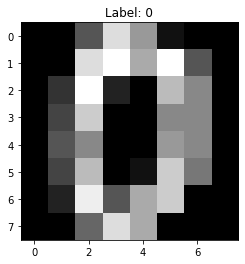

In [ ]:
plt.imshow(X[0].reshape(8, 8), cmap='gist_gray')
plt.title('Label: {}'.format(y[0]))


### Шаг 3.2 - Сравниваем классификаторы и ансамбли
- Обучите алгоритм ближайших соседей и решающее дерево на загруженных данных
- Получите правильность для каждого алгоритма на семифолдовой кросс-валидации
- Постройте ансамбль из 100 деревьев, получите правильность для него
- Добавьте к ансамблю Метод случайных подпространств, повторите обучение и оценку качества
- Проинтерпретируйте полученные результаты


In [ ]:
# your code here

In [ ]:
knn = KNeighborsClassifier(n_neighbors=44)
tree = DecisionTreeClassifier(max_depth=7)

print('KNN:', cross_val_score(knn, X, y, cv=7).mean())
print('Tree:', cross_val_score(tree, X, y, cv=7).mean())

KNN: 0.9332267926625902
Tree: 0.7696115897720957


In [ ]:
b = BaggingClassifier(tree, n_estimators=100)
print('Bagging:', cross_val_score(b, X, y, cv=7).mean())

Bagging: 0.8853377744580323


In [ ]:
b = BaggingClassifier(tree, n_estimators=100, max_features=19/64)
print('Bagging:', cross_val_score(b, X, y, cv=7).mean())

Bagging: 0.9215167280433575


## Практика 4

*Во всех задачах имеется в виду cross_val_score на случайном лесе.*

### Задача 4.1

Возьмите RandomForestClassifier из sklearn.

Обучите его с похожими параметрами(кол-во деревьев, random_state, max_features).

И сравните результат с "бэггингом, который как случайный лес(предыдущая практика)"


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=7)
print('Random forest from sklearn:', cross_val_score(rfc, X, y, cv=7).mean())

Random forest from sklearn: 0.9204028279599779


### Задача 4.2
Постройте график cross_val_score от количества деревьев.

n_estimators (1, 150) шаг равный 5


In [ ]:
fig = plt.figure(figsize=(12, 5))
plt.barh(None, None, color='purple')
plt.show()

<Figure size 864x360 with 0 Axes>

### Задача 4.3
Постройте график cross_val_score от количества фич.

max_features = (1..N features)

используйте 50/100 деревьев (в зависимости от скорости выполнения)

In [ ]:
# your code here

### Задача 4.4

Постройте график cross_val_score от глубины дерева.


max_depth = (1..30)

используйте 50/100 деревьев(в зависимости от скорости), постройте 2 графика:

max_features = n

max_features = 'sqrt'

In [ ]:
# your code here

### Задача 4.5
Получите наилучшее качество cross_val_score(accuracy) на этом датасете, используя случайный лес и GridSearchCV




In [ ]:
# your code here

### Задача 4.6
С помощью параметров из предыдущей задачи, обучите случайный лес, посчитайте accuracy и нарисуйте те объекты, на которых алгоритм ошибается.

Картинка. Подпись вида (Алгоритм: 3, Реально: 5)

In [ ]:
# your code here

### Задача 4.7
Попробуйте получить качество лучше используя другой алгоритм

In [ ]:
# your code here